<a href="https://colab.research.google.com/github/SeryeongLee/-/blob/main/%EC%A0%84%EC%B2%98%EB%A6%AC_0524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pip install --upgrade pandas

     |████████████████████████████████| 9.9MB 7.1MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from scipy.special import erfc
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, VotingRegressor

from lightgbm import LGBMRegressor

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

import warnings

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/data science/first/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data science/first/data/test.csv')

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


### 1) 0, 1 변환

In [ ]:
# binary transform (0, 1)

train.gender = train.gender.replace(['F','M'],[0,1])  
test.gender = test.gender.replace(['F','M'],[0,1])

train.car = train.car.replace(['N','Y'],[0,1])  
test.car = test.car.replace(['N','Y'],[0,1])

train.reality = train.reality.replace(['N','Y'],[0,1])  
test.reality = test.reality.replace(['N','Y'],[0,1])

### 2) 양수 변환, 360으로 나눠 나이 변수 추가

In [ ]:
# 음수 -> 양수 변환

train.DAYS_BIRTH = -train.DAYS_BIRTH
test.DAYS_BIRTH = -test.DAYS_BIRTH

train.DAYS_EMPLOYED = -train.DAYS_EMPLOYED
test.DAYS_EMPLOYED = -test.DAYS_EMPLOYED

train.begin_month = -train.begin_month
test.begin_month = -test.begin_month

In [ ]:
# 365243 인 값 0으로 바꾸기

train.DAYS_EMPLOYED = train.DAYS_EMPLOYED.replace([-365243],[0])
test.DAYS_EMPLOYED = test.DAYS_EMPLOYED.replace([-365243],[0])

In [ ]:
# 360으로 나눠서 나이, 일한 년수 계산

train['EMPLOYED']= train.DAYS_EMPLOYED.apply(lambda x: abs(x/360) )
train['age']= train.DAYS_BIRTH.apply(lambda x: abs(x/360) ).astype(int)
train['begin_month']= train.begin_month.apply(lambda x: abs(x) ).astype(int)

test['EMPLOYED']= test.DAYS_EMPLOYED.apply(lambda x: abs(x/360) )
test['age']= test.DAYS_BIRTH.apply(lambda x: abs(x/360) ).astype(int)
test['begin_month']= test.begin_month.apply(lambda x: abs(x) ).astype(int)

### 3) log 변환

1. income_total

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


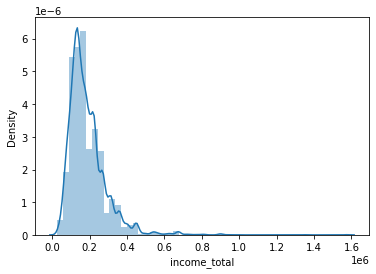

In [ ]:
tr_it=train['income_total']
sns.distplot(tr_it)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


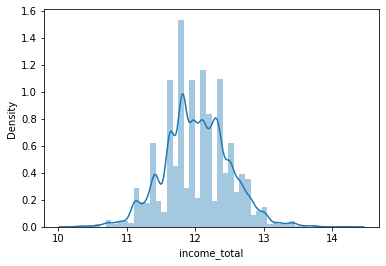

In [ ]:
tr_it_log = np.log1p(tr_it)
sns.distplot(tr_it_log)
# train에 로그변환한 변수로 바꾸기
train['income_total']= tr_it_log

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


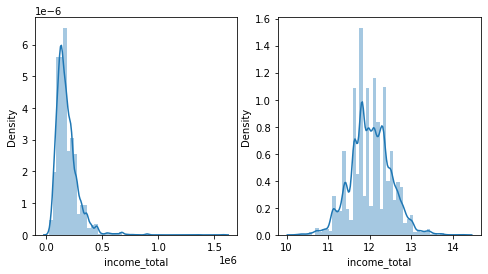

In [ ]:
# test set도

te_it=test['income_total']
te_it_log = np.log1p(te_it)
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(8,4)
sns.distplot(te_it,ax=ax1)
sns.distplot(tr_it_log,ax=ax2)

  2. DAYS_BIRTH

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


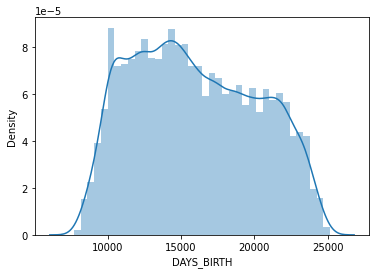

In [ ]:
sns.distplot(train['DAYS_BIRTH'])

얘는 log 안해줘도 될 듯

  3. DAYS_EMPLOYED (360으로 나눠서 EMPLOYED화 한 것)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


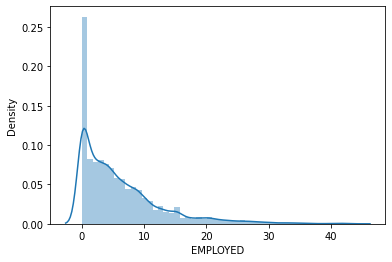

In [ ]:
sns.distplot(train['EMPLOYED'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


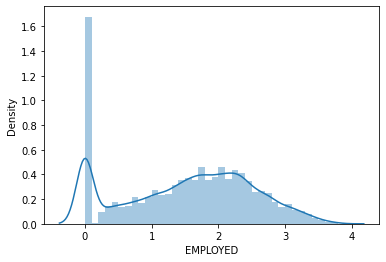

In [ ]:
sns.distplot(np.log1p(train['EMPLOYED']))

# 로그변환한 변수로 바꾸기
train['EMPLOYED']= np.log1p(train['EMPLOYED'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


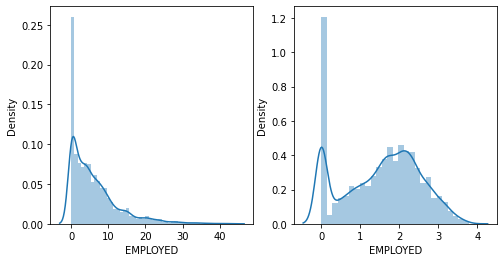

In [ ]:
# test도 해주기

fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(8,4)
sns.distplot(test['EMPLOYED'],ax=ax1)
sns.distplot(np.log1p(test['EMPLOYED']),ax=ax2)

In [ ]:
train.groupby(['child_num'])['child_num'].count()

child_num
0     18340
1      5386
2      2362
3       306
4        47
5        10
7         2
14        3
19        1
Name: child_num, dtype: int64

In [ ]:
train.groupby(['family_size'])['family_size'].count()

family_size
1.0      5109
2.0     14106
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
9.0         2
15.0        3
20.0        1
Name: family_size, dtype: int64

In [ ]:
# child_num이 14, 19인 행 지우기

idx_child_drop = train[(train['child_num'] == 14)|(train['child_num'] == 19)].index
train = train.drop(idx_child_drop)

In [ ]:
# child_num이 family_size보다 큰 행도 지우기

idx_child_drop2 = train[train['family_size'] < train['child_num']].index
train = train.drop(idx_child_drop2)

In [ ]:
train.shape

(26452, 22)

In [ ]:
train.groupby(['family_size'])['family_size'].count()

family_size
1.0     5108
2.0    14106
3.0     4632
4.0     2260
5.0      291
6.0       44
7.0        9
9.0        2
Name: family_size, dtype: int64

In [ ]:
# test도 지우면 좋을 애 있는지 확인

test.groupby(['child_num'])['child_num'].count()

child_num
0    6861
1    2106
2     894
3     113
4      16
5      10
Name: child_num, dtype: int64

In [ ]:
test.groupby(['family_size'])['family_size'].count()

family_size
1.0    1878
2.0    5357
3.0    1789
4.0     846
5.0     106
6.0      14
7.0      10
Name: family_size, dtype: int64

In [ ]:
# test도 드랍
idx_child_drop_test = test[test['family_size'] < test['child_num']].index
test = test.drop(idx_child_drop_test)

family_size와 child_num에서의 이상치값 제거

### 4) child_num, family_size 관련 컬럼 추가

child_num, family_size 두개 중 하나를 빼면 성능이 오히려 낮아지는 것 같아서 둘을 가공한 새로운 컬럼을 만들어서 해보려고 한다.

1. child_num/family_size -> cf_ratio
2. income_total/child_num -> ic_ratio  # 근데 이 경우에는 inf 생김-> 삭제  
3. income_total/family_size -> if_ratio


In [ ]:
train['cf_ratio'] = train['child_num'] / train['family_size']
test['cf_ratio'] = test['child_num'] / test['family_size']

train['if_ratio'] = train['income_total'] / train['family_size']
test['if_ratio'] = test['income_total'] / test['family_size']

In [ ]:
train['cf_ratio'].head()

0    0.000000
1    0.333333
2    0.000000
3    0.000000
4    0.000000
Name: cf_ratio, dtype: float64

In [ ]:
train['ic_ratio'].head()

0         inf
1    12.41917
2         inf
3         inf
4         inf
Name: ic_ratio, dtype: float64

In [ ]:
train['if_ratio'].head()

0    6.109250
1    4.139723
2    6.508503
3    6.109250
4    5.983594
Name: if_ratio, dtype: float64

### 5) 결측치 처리

먼저 days_employed가 0인 애들은 'unemployed'로 주기  
백수 처리

In [ ]:
train['DAYS_EMPLOYED'].count

<bound method Series.count of 0        4709
1        1540
2        4434
3        2092
4        2105
         ... 
26452    1984
26453    2475
26454    2015
26455     107
26456    1013
Name: DAYS_EMPLOYED, Length: 26452, dtype: int64>

In [ ]:
def unemployed(data):
  data.loc[(data['DAYS_EMPLOYED'] == 0), 'occyp_type'] = 'unemployed'

unemployed(train)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26452 entries, 0 to 26456
Data columns (total 25 columns):
index            26452 non-null int64
gender           26452 non-null int64
car              26452 non-null int64
reality          26452 non-null int64
child_num        26452 non-null int64
income_total     26452 non-null float64
income_type      26452 non-null object
edu_type         26452 non-null object
family_type      26452 non-null object
house_type       26452 non-null object
DAYS_BIRTH       26452 non-null int64
DAYS_EMPLOYED    26452 non-null int64
FLAG_MOBIL       26452 non-null int64
work_phone       26452 non-null int64
phone            26452 non-null int64
email            26452 non-null int64
occyp_type       22719 non-null object
family_size      26452 non-null float64
begin_month      26452 non-null int64
credit           26452 non-null float64
EMPLOYED         26452 non-null float64
age              26452 non-null int64
cf_ratio         26452 non-null float64
ic

In [ ]:
# test도

unemployed(test)

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,EMPLOYED,age,cf_ratio,ic_ratio,if_ratio
0,0,0,0,0,0,12.218500,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,1,0,0,0,NaN,2.0,6,1.0,2.644795,38,0.000000,inf,6.109250
1,1,0,0,1,1,12.419170,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,1,0,0,1,Laborers,3.0,5,1.0,1.663505,31,0.333333,12.41917,4.139723
2,2,1,1,1,0,13.017005,Working,Higher education,Married,House / apartment,19087,4434,1,0,1,0,Managers,2.0,22,2.0,2.589016,53,0.000000,inf,6.508503
3,3,0,0,1,0,12.218500,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,1,0,1,0,Sales staff,2.0,37,0.0,1.918555,41,0.000000,inf,6.109250
4,4,0,1,1,0,11.967187,State servant,Higher education,Married,House / apartment,15037,2105,1,0,0,0,Managers,2.0,26,2.0,1.923843,41,0.000000,inf,5.983594


나머지 결측치는 심층신경망 쓰는 알고리즘.... 써서 채워보자

Datawig

In [ ]:
from sklearn import preprocessing

!pip install datawig

import datawig

  Using cached https://files.pythonhosted.org/packages/63/e0/a1b39cdcb2c391f087a1538bc8a6d62a82d0439693192aef541d7b123769/pandas-0.25.3-cp37-cp37m-manylinux1_x86_64.whl
ERROR: xarray 0.18.0 has requirement pandas>=1.0, but you'll have pandas 0.25.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.3 which is incompatible.
  Found existing installation: pandas 0.25.0
    Uninstalling pandas-0.25.0:
      Successfully uninstalled pandas-0.25.0


In [ ]:
train_label = train.copy()
test_label = test.copy()
label_encoder=preprocessing.LabelEncoder()

# 소득 형태 변환
train_label['income_type']=label_encoder.fit_transform(train['income_type'])
test_label['income_type']=label_encoder.transform(test['income_type'])

# 학력 수준 변환
train_label['edu_type']=label_encoder.fit_transform(train['edu_type'])
test_label['edu_type']=label_encoder.transform(test['edu_type'])

# 가족 형태 변환
train_label['family_type']=label_encoder.fit_transform(train['family_type'])
test_label['family_type']=label_encoder.transform(test['family_type'])

# 가족 형태 변환
train_label['house_type']=label_encoder.fit_transform(train['house_type'])
test_label['house_type']=label_encoder.transform(test['house_type'])

# 직업 형태 변환
train_label['occyp_type']=label_encoder.fit_transform(train['occyp_type'].astype(str))
test_label['occyp_type']=label_encoder.fit_transform(test['occyp_type'].astype(str))

In [ ]:
# pip install pandas==0.25.0

     |████████████████████████████████| 10.4MB 7.3MB/s 
ERROR: xarray 0.18.0 has requirement pandas>=1.0, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.0 which is incompatible.
ERROR: datawig 0.2.0 has requirement pandas==0.25.3, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 0.25.3
    Uninstalling pandas-0.25.3:
      Successfully uninstalled pandas-0.25.3


In [ ]:
train_label.corr()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,EMPLOYED,age,cf_ratio,ic_ratio,if_ratio
index,1.000000,-0.006306,0.004171,0.006656,0.001048,0.004475,0.009495,-0.003191,0.009164,-0.002158,0.008884,-0.000409,NaN,-0.005540,-0.001756,0.005336,-0.000073,-0.002890,-0.002248,-0.007850,-0.001895,0.008844,0.003113,0.005561,0.004483
gender,-0.006306,1.000000,0.362132,-0.048955,0.076737,0.231521,0.102934,0.006226,-0.102035,0.067504,-0.201263,-0.033906,NaN,0.064497,-0.026904,0.000167,-0.136227,0.111463,-0.007852,0.001433,0.055844,-0.201519,0.066962,-0.005659,-0.089004
car,0.004171,0.362132,1.000000,-0.016613,0.103048,0.231394,0.048220,-0.105696,-0.124334,0.018668,-0.156993,0.004376,NaN,0.026289,-0.013562,0.018958,-0.126614,0.150871,0.029828,0.007650,0.082281,-0.156892,0.094127,-0.027130,-0.138653
reality,0.006656,-0.048955,-0.016613,1.000000,-0.001586,0.036216,-0.048522,0.011502,0.028030,-0.177957,0.130237,-0.038528,NaN,-0.208717,-0.065588,0.051105,0.051685,-0.008507,-0.003865,-0.009422,-0.066377,0.130740,-0.002811,0.007670,0.018385
child_num,0.001048,0.076737,0.103048,-0.001586,1.000000,0.037392,0.106968,-0.052706,-0.169425,0.024800,-0.343208,0.045096,NaN,0.052559,-0.010969,0.017641,-0.147514,0.886867,0.007410,0.002038,0.142690,-0.343496,0.954081,-0.944967,-0.589365
income_total,0.004475,0.231521,0.231394,0.036216,0.037392,1.000000,-0.057411,-0.227453,-0.000113,-0.000551,-0.105337,0.101063,NaN,-0.045965,0.001577,0.091742,-0.133123,0.022958,0.023685,0.005496,0.172590,-0.105233,0.047047,0.158055,0.077386
income_type,0.009495,0.102934,0.048220,-0.048522,0.106968,-0.057411,1.000000,0.056578,-0.050915,0.033068,-0.211485,0.188913,NaN,0.161894,0.004473,-0.020006,-0.213458,0.107587,-0.002777,-0.008284,0.280467,-0.211611,0.108785,-0.064209,-0.094981
edu_type,-0.003191,0.006226,-0.105696,0.011502,-0.052706,-0.227453,0.056578,1.000000,0.008633,-0.039632,0.166684,-0.016764,NaN,-0.023773,-0.045158,-0.095605,0.089266,-0.043676,-0.013846,0.013695,-0.061173,0.166826,-0.060239,-0.030427,0.010485
family_type,0.009164,-0.102035,-0.124334,0.028030,-0.169425,-0.000113,-0.050915,0.008633,1.000000,0.007227,0.104608,-0.052480,NaN,-0.065581,-0.014452,-0.015389,0.062558,-0.557782,-0.030677,-0.005317,-0.096121,0.104260,-0.125419,0.094389,0.779718
house_type,-0.002158,0.067504,0.018668,-0.177957,0.024800,-0.000551,0.033068,-0.039632,0.007227,1.000000,-0.210033,-0.022465,NaN,0.031380,-0.019016,0.013499,-0.068808,0.005789,-0.030553,-0.008985,0.023710,-0.209918,0.035281,0.034704,0.008184


In [ ]:
# data split
train_notnull = train[train.occyp_type.notnull()]
train_null = train[train.occyp_type.isnull()]

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['EMPLOYED','age','income_type'], # column(s) containing information about the column we want to impute
    output_column='occyp_type', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=train_notnull, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(train_null)

2021-05-24 17:32:26,535 [INFO]  CategoricalEncoder for column occyp_type                                found only 88 occurrences of value Secretaries
2021-05-24 17:32:26,537 [INFO]  CategoricalEncoder for column occyp_type                                found only 62 occurrences of value Realty agents
2021-05-24 17:32:26,538 [INFO]  CategoricalEncoder for column occyp_type                                found only 57 occurrences of value HR staff
2021-05-24 17:32:26,541 [INFO]  CategoricalEncoder for column occyp_type                                found only 38 occurrences of value IT staff
2021-05-24 17:32:27,112 [INFO]  
========== start: fit model
2021-05-24 17:32:27,114 [WARNING]  Already bound, ignoring bind()
2021-05-24 17:32:42,826 [INFO]  Epoch[0] Batch [0-639]	Speed: 652.91 samples/sec	cross-entropy=1.728703	occyp_type-accuracy=0.405664
2021-05-24 17:32:58,281 [INFO]  Epoch[0] Train-cross-entropy=1.698404
2021-05-24 17:32:58,283 [INFO]  Epoch[0] Train-occyp_type-accuracy=0.4

/usr/local/lib/python3.7/dist-packages/datawig/calibration.py:92: RuntimeWarning: divide by zero encountered in log
  return np.log(probas)


In [ ]:
imputed = imputed.drop(['occyp_type','occyp_type_imputed_proba'],axis=1)

imputed = imputed.rename(columns = {'occyp_type_imputed':'occyp_type'})

train_imputed = pd.concat([train_notnull,imputed],axis = 0)

train_imputed.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,DAYS_BIRTH,DAYS_EMPLOYED,EMPLOYED,FLAG_MOBIL,age,begin_month,car,cf_ratio,child_num,credit,edu_type,email,family_size,family_type,gender,house_type,ic_ratio,if_ratio,income_total,income_type,index,occyp_type,phone,reality,work_phone
1,11380,1540,1.663505,1,31,5,0,0.333333,1,1.0,Secondary / secondary special,1,3.0,Civil marriage,0,House / apartment,12.41917,4.139723,12.419170,Commercial associate,1,Laborers,0,1,0
2,19087,4434,2.589016,1,53,22,1,0.000000,0,2.0,Higher education,0,2.0,Married,1,House / apartment,inf,6.508503,13.017005,Working,2,Managers,1,1,0
3,15088,2092,1.918555,1,41,37,0,0.000000,0,0.0,Secondary / secondary special,0,2.0,Married,0,House / apartment,inf,6.109250,12.218500,Commercial associate,3,Sales staff,1,1,0
4,15037,2105,1.923843,1,41,26,1,0.000000,0,2.0,Higher education,0,2.0,Married,0,House / apartment,inf,5.983594,11.967187,State servant,4,Managers,0,1,0
5,13413,4996,2.699869,1,37,18,0,0.500000,2,1.0,Secondary / secondary special,1,4.0,Married,0,House / apartment,6.25309,3.126545,12.506181,Working,5,High skill tech staff,0,1,0


드디어 채웠다

In [ ]:
# data split
test_notnull = test[test.occyp_type.notnull()]
test_null = test[test.occyp_type.isnull()]

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['DAYS_EMPLOYED','DAYS_BIRTH','income_type'], # column(s) containing information about the column we want to impute
    output_column='occyp_type', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=test_notnull, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed_2 = imputer.predict(test_null)

In [ ]:
imputed_2 = imputed_2.drop(['occyp_type','occyp_type_imputed_proba'],axis=1)

imputed_2 = imputed_2.rename(columns = {'occyp_type_imputed':'occyp_type'})

test_imputed = pd.concat([test_notnull,imputed_2],axis = 0)

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE
from imblearn.over_sampling import SMOTENC

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import tensorflow as tf
from tensorflow import feature_column

임배딩 방법으로 income_type이랑 family_type, house_type 처리하자.

edu_type은 원핫쓰자.

In [ ]:
family_em_train = feature_column.embedding_column(train_imputed['family_type'],dimension=8)
income_em_train = feature_column.embedding_column(train_imputed['income_type'],dimension=8)
house_em_train = feature_column.embedding_column(train_imputed['house_type'],dimension=8)

In [ ]:
family_em_test = feature_column.embedding_column(test_imputed['family_type'],dimension=8)
income_em_test = feature_column.embedding_column(test_imputed['income_type'],dimension=8)
house_em_test = feature_column.embedding_column(test_imputed['house_type'],dimension=8)

In [ ]:
edu_train = pd.get_dummies(train_imputed.edu_type)
# edu_test = pd.get_dummies(test_imputed.edu_type)

삭제할 애들

In [ ]:
train_imputed.head()

,DAYS_BIRTH,DAYS_EMPLOYED,EMPLOYED,FLAG_MOBIL,age,begin_month,car,cf_ratio,child_num,credit,edu_type,email,family_size,family_type,gender,house_type,ic_ratio,if_ratio,income_total,income_type,index,occyp_type,phone,reality,work_phone
1,11380,1540,1.663505,1,31,5,0,0.333333,1,1.0,Secondary / secondary special,1,3.0,Civil marriage,0,House / apartment,12.41917,4.139723,12.419170,Commercial associate,1,Laborers,0,1,0
2,19087,4434,2.589016,1,53,22,1,0.000000,0,2.0,Higher education,0,2.0,Married,1,House / apartment,inf,6.508503,13.017005,Working,2,Managers,1,1,0
3,15088,2092,1.918555,1,41,37,0,0.000000,0,0.0,Secondary / secondary special,0,2.0,Married,0,House / apartment,inf,6.109250,12.218500,Commercial associate,3,Sales staff,1,1,0
4,15037,2105,1.923843,1,41,26,1,0.000000,0,2.0,Higher education,0,2.0,Married,0,House / apartment,inf,5.983594,11.967187,State servant,4,Managers,0,1,0
5,13413,4996,2.699869,1,37,18,0,0.500000,2,1.0,Secondary / secondary special,1,4.0,Married,0,House / apartment,6.25309,3.126545,12.506181,Working,5,High skill tech staff,0,1,0


In [ ]:
train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26452 entries, 1 to 26453
Data columns (total 25 columns):
DAYS_BIRTH       26452 non-null int64
DAYS_EMPLOYED    26452 non-null int64
EMPLOYED         26452 non-null float64
FLAG_MOBIL       26452 non-null int64
age              26452 non-null int64
begin_month      26452 non-null int64
car              26452 non-null int64
cf_ratio         26452 non-null float64
child_num        26452 non-null int64
credit           26452 non-null float64
edu_type         26452 non-null object
email            26452 non-null int64
family_size      26452 non-null float64
family_type      26452 non-null object
gender           26452 non-null int64
house_type       26452 non-null object
ic_ratio         26452 non-null float64
if_ratio         26452 non-null float64
income_total     26452 non-null float64
income_type      26452 non-null object
index            26452 non-null int64
occyp_type       26452 non-null object
phone            26452 non-null int6

In [ ]:
train_imputed = train_imputed.drop(['index', 'FLAG_MOBIL', 'DAYS_BIRTH', 'DAYS_EMPLOYED'])

In [ ]:
test_imputed.head()

In [ ]:
test_imputed = test_imputed.drop(['index', 'FLAG_MOBIL', 'DAYS_BIRTH', 'DAYS_EMPLOYED'])

이후 더 시행해야 될 부분
*   타겟변수에 영향을 주는 파생변수 더 만들기
*   embedding hyperparameter tunning
*   나이, 다른 것 등의 구간화
*   family_size + child_num => pca로 1차원으로 만들어보기





